In [6]:
library(RCurl)
download <- getURL("https://raw.githubusercontent.com/VenkataNadam/R-Coding/master/enexis_gas_01012011.csv")
data1 <- read.csv (text = download)
download <- getURL("https://raw.githubusercontent.com/VenkataNadam/R-Coding/master/enexis_gas_01012012.csv")
data2 <- read.csv (text = download)
download <- getURL("https://raw.githubusercontent.com/VenkataNadam/R-Coding/master/enexis_gas_01012013.csv")
data3 <- read.csv (text = download)
download <- getURL("https://raw.githubusercontent.com/VenkataNadam/R-Coding/master/enexis_gas_01012014.csv")
data4 <- read.csv (text = download)
download <- getURL("https://raw.githubusercontent.com/VenkataNadam/R-Coding/master/enexis_gas_01012015.csv")
data5 <- read.csv (text = download)
download <- getURL("https://raw.githubusercontent.com/VenkataNadam/R-Coding/master/enexis_gas_01012016.csv")
data6 <- read.csv (text = download)
download <- getURL("https://raw.githubusercontent.com/VenkataNadam/R-Coding/master/enexis_gas_01012017.csv")
data7 <- read.csv (text = download)
download <- getURL("https://raw.githubusercontent.com/VenkataNadam/R-Coding/master/enexis_gas_01012018.csv")
data8 <- read.csv (text = download)

In [7]:
library(sqldf)
df1<-  sqldf("select * from data1 order by random() limit 400")
df2<- sqldf("select * from data2 order by random() limit 400")
df3<- sqldf("select * from data3 order by random() limit 400")
df4<- sqldf("select * from data4 order by random() limit 400")
df5<- sqldf("select * from data5 order by random() limit 400")
df6<- sqldf("select * from data6 order by random() limit 400")
df7<- sqldf("select * from data7 order by random() limit 400")
df8<- sqldf("select * from data8 order by random() limit 400")
tempData = rbind(df1,df2,df3,df4,df5,df6,df7,df8)
nrow(tempData)
head(tempData)
names(tempData)

[1] 3200

net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
Enexis B.V.,ENEXIS,Pieter Langendijkstraat,9602BW,9602BW,HOOGEZAND,100,22,100,100,G4,533,0,NA
Enexis B.V.,ENEXIS,Pr. Beatrixlaan,7711KG,7711KG,NIEUWLEUSEN,100,14,100,50,G4,3667,0,NA
Enexis B.V.,ENEXIS,Kalfstraat,6212GV,6212GW,MAASTRICHT,100,23,100,100,G4,2808,0,NA
Enexis B.V.,ENEXIS,Westersingel,4611HV,4611HV,BERGEN OP ZOOM,100,14,100,93,G4,1758,0,NA
Enexis B.V.,ENEXIS,Neerstraat,5215AM,5215AM,'S-HERTOGENBOSCH,100,16,100,100,G4,285,0,NA
Enexis B.V.,ENEXIS,Mussenberg,6085CE,6085CG,HORN,100,24,100,96,G4,2270,0,NA


[1] "net_manager"                  "purchase_area"               
 [3] "street"                       "zipcode_from"                
 [5] "zipcode_to"                   "city"                        
 [7] "delivery_perc"                "num_connections"             
 [9] "perc_of_active_connections"   "type_conn_perc"              
[11] "type_of_connection"           "annual_consume"              
[13] "annual_consume_lowtarif_perc" "smartmeter_perc"

In [33]:
library(dplyr)
finalData <- select(tempData,
                   PurchaseArea = purchase_area,
                   Street = street,
                   City = city,
                   Type = type_of_connection,
                   AnnualConsumption = annual_consume,
                   noOfConnections = num_connections
                   )
#performing basic checks
names(finalData)
head(finalData)
nrow(finalData)
sum(is.na(finalData))
library(sqldf)
sqldf("select distinct(Type) from finalData")

[1] "PurchaseArea"      "Street"            "City"             
[4] "Type"              "AnnualConsumption" "noOfConnections"

PurchaseArea,Street,City,Type,AnnualConsumption,noOfConnections
ENEXIS,Pieter Langendijkstraat,HOOGEZAND,G4,533,22
ENEXIS,Pr. Beatrixlaan,NIEUWLEUSEN,G4,3667,14
ENEXIS,Kalfstraat,MAASTRICHT,G4,2808,23
ENEXIS,Westersingel,BERGEN OP ZOOM,G4,1758,14
ENEXIS,Neerstraat,'S-HERTOGENBOSCH,G4,285,16
ENEXIS,Mussenberg,HORN,G4,2270,24


[1] 3200

[1] 0

Type
G4
G16
G6
G25
G10


In [9]:
library(psych)
describe(finalData$AnnualConsumption)
library(pastecs)
stat.desc(finalData$AnnualConsumption)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,3200,2007.268,1122.582,1799.5,1888.158,664.9461,16,26449.4,26433.4,5.85446,91.13247,19.84464


nbr.val     nbr.null       nbr.na          min          max        range 
3.200000e+03 0.000000e+00 0.000000e+00 1.600000e+01 2.644940e+04 2.643340e+04 
         sum       median         mean      SE.mean CI.mean.0.95          var 
6.423257e+06 1.799500e+03 2.007268e+03 1.984464e+01 3.890950e+01 1.260191e+06 
     std.dev     coef.var 
1.122582e+03 5.592589e-01

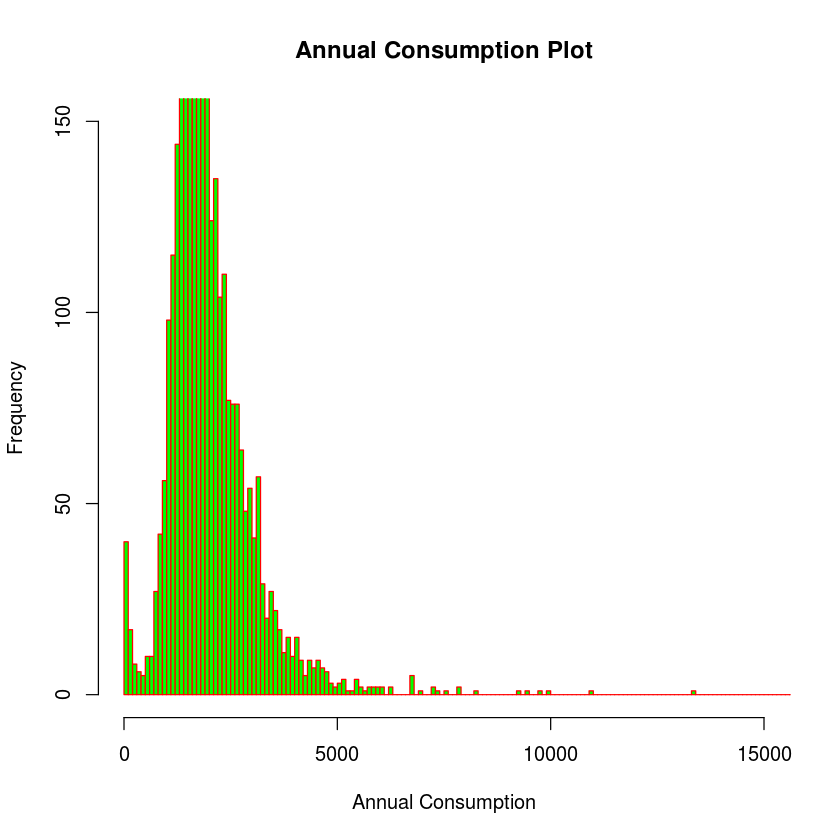

In [10]:
hist(finalData$AnnualConsumption,
     main = "Annual Consumption Plot",
     xlab = "Annual Consumption",
     col = "green",
     border = "red", 
     xlim = c(0,15000),
     ylim = c(0,150),
     breaks = 200)

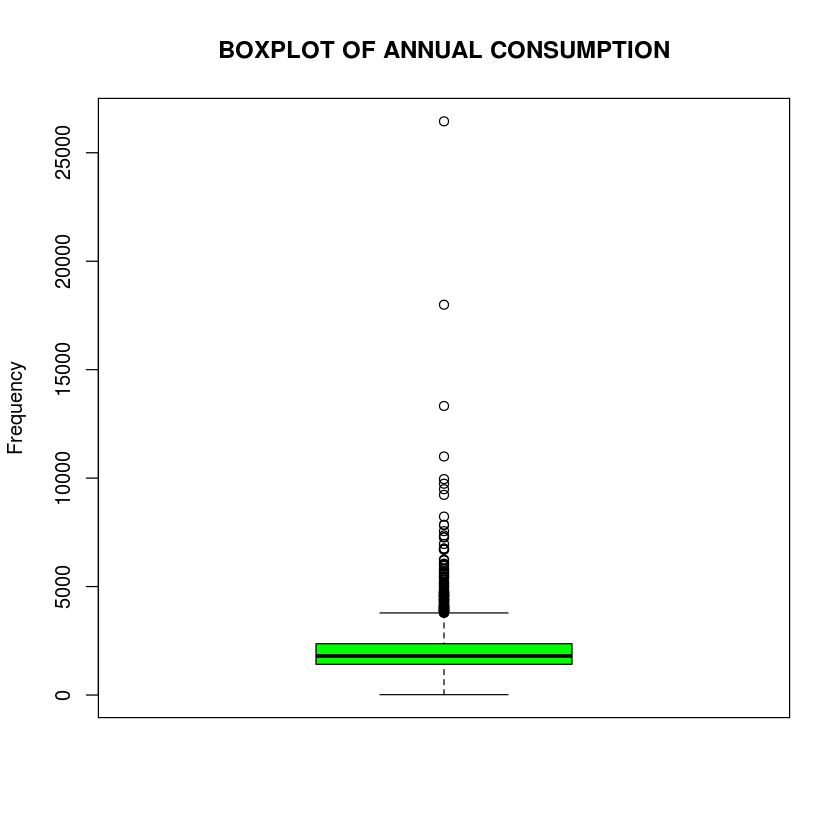

In [11]:
boxplot(finalData$AnnualConsumption,
        main = toupper("Boxplot of Annual Consumption"),
        ylab = "Frequency",
        col = "green")

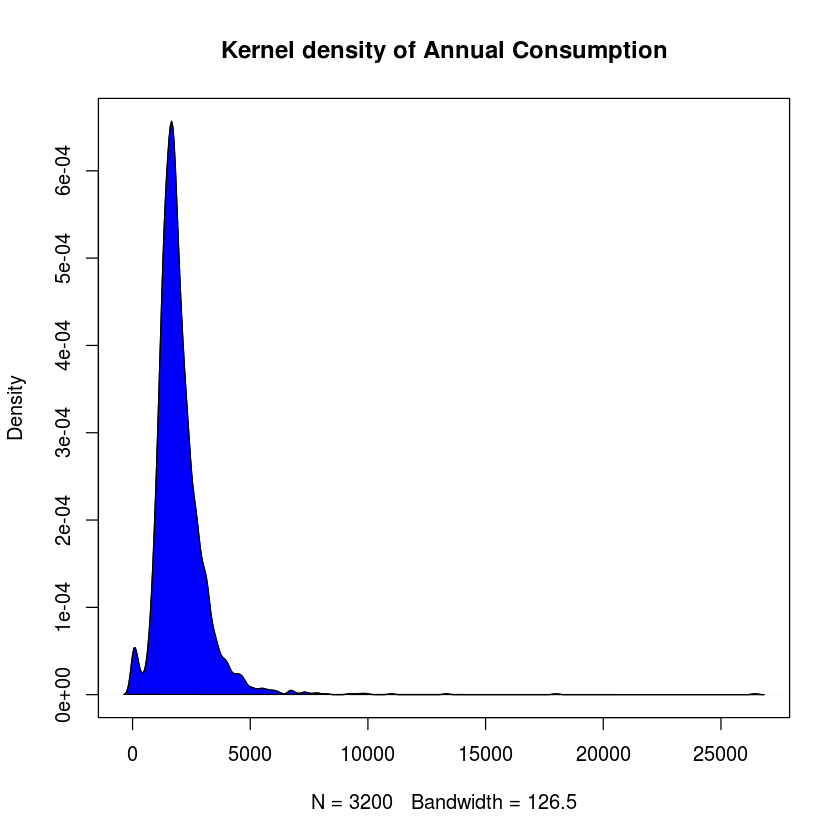

In [12]:
d <- density(finalData$AnnualConsumption)
plot(d, main = "Kernel density of Annual Consumption")
polygon(d, col = "blue", border = "black")

In [13]:
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(finalData), 0.8*nrow(finalData))  # row indices for training data
trainingDataGas <- finalData[trainingRowIndex, ]  # model training data
testDataGas  <- finalData[-trainingRowIndex, ]   # test data
dim(trainingDataGas)
dim(testDataGas)

[1] 2560    6

[1] 640   6

In [14]:
describe(trainingDataGas$AnnualConsumption)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,2560,2012.443,1163.99,1801,1888.138,661.2915,16,26449.4,26433.4,6.364366,97.89655,23.00537


In [15]:
trainingDataGasTemp <- trainingDataGas
trainingDataGasTemp$Category <- ifelse(trainingDataGasTemp$AnnualConsumption >=1980, 1, 0)
library(sqldf)
sqldf("select Category,count(*) from trainingDataGasTemp group by Category")

testDataGasTemp <- testDataGas
testDataGasTemp$Category <- ifelse(testDataGasTemp$AnnualConsumption >=1980, 1, 0)
library(sqldf)
sqldf("select Category,count(*) from testDataGasTemp group by Category")

Category,count(*)
0,1533
1,1027


Category,count(*)
0,391
1,249


In [16]:
logitMod <- glm(Category ~ AnnualConsumption + noOfConnections, 
                data=trainingDataGasTemp, 
                family=binomial(link="logit"))

predicted <- predict(logitMod, testDataGasTemp, type="response")  # predicted scores
head(predicted)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

1            3            8           18           26           33 
2.220446e-16 1.000000e+00 1.000000e+00 2.220446e-16 1.000000e+00 2.220446e-16

In [17]:
table(testDataGasTemp$Category, predicted > 0.8)

   
    FALSE TRUE
  0   391    0
  1     0  249

In [18]:
summary(logitMod)


Call:
glm(formula = Category ~ AnnualConsumption + noOfConnections, 
    family = binomial(link = "logit"), data = trainingDataGasTemp)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.01474   0.00000   0.00000   0.00000   0.01696  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.819e+04  7.036e+04  -0.259    0.796
AnnualConsumption  9.193e+00  3.556e+01   0.259    0.796
noOfConnections   -2.054e-01  1.287e+01  -0.016    0.987

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3.4482e+03  on 2559  degrees of freedom
Residual deviance: 5.7945e-04  on 2557  degrees of freedom
AIC: 6.0006

Number of Fisher Scoring iterations: 25


In [19]:
library(car)
vif(logitMod)

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:psych’:

    logit

The following object is masked from ‘package:dplyr’:

    recode



AnnualConsumption   noOfConnections 
          1.00391           1.00391

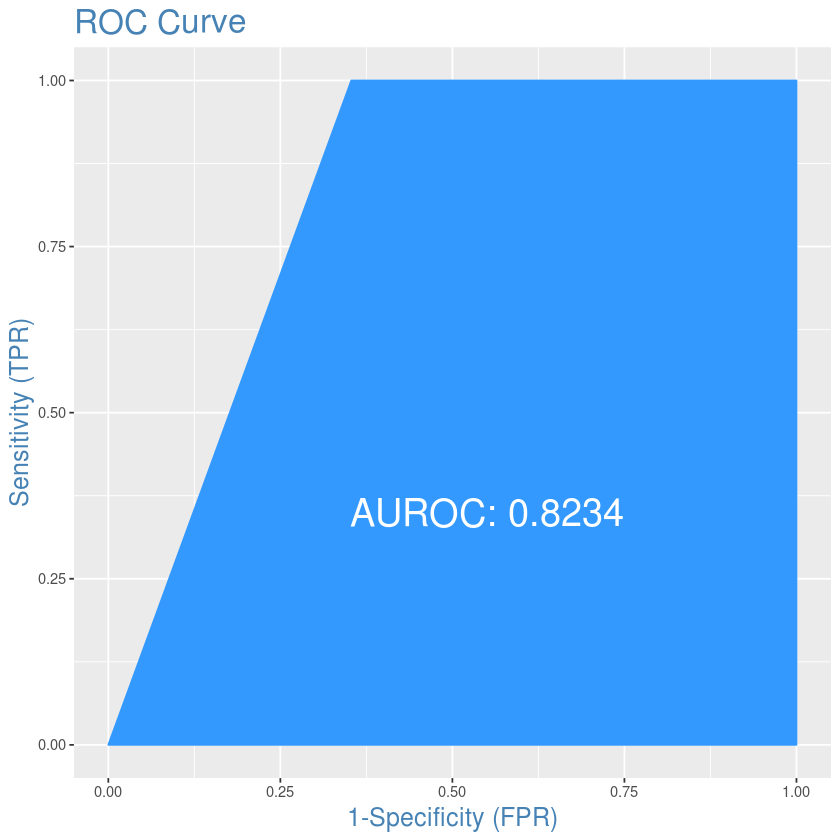

In [20]:
library(InformationValue)
plotROC(testDataGasTemp, predicted)

In [21]:
optCutOff <- optimalCutoff(testDataGasTemp$Category, predicted)[1] 
optCutOff

[1] 0.01


Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha



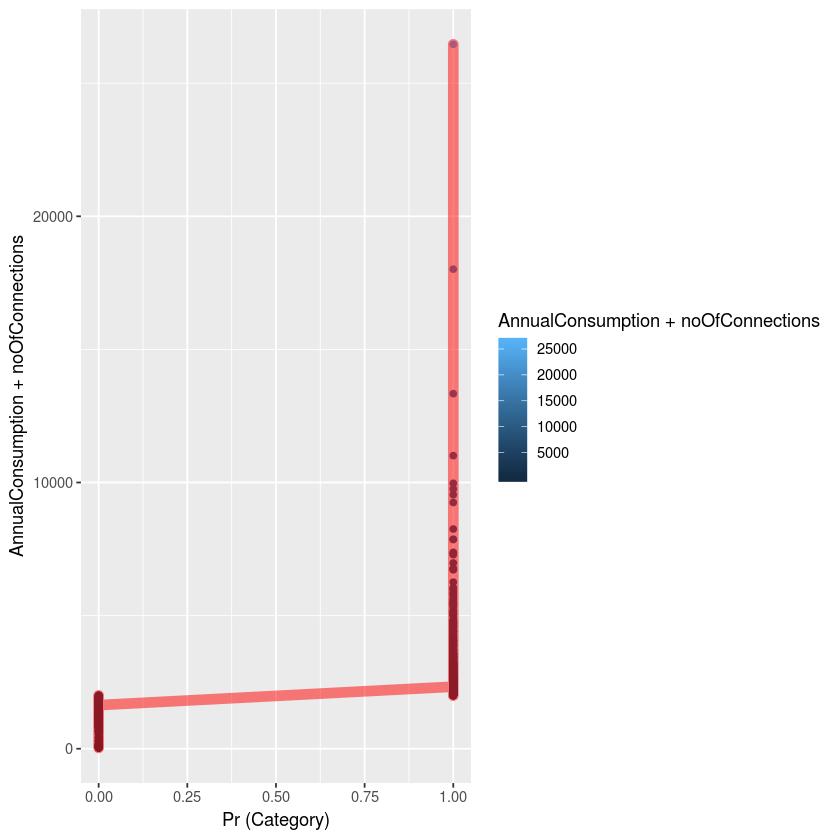

In [22]:
library("ggplot2")
pl <- ggplot(trainingDataGasTemp, aes(Category, as.numeric(AnnualConsumption + noOfConnections),
                       color=AnnualConsumption + noOfConnections)) +
  #stat_smooth(method="loess", formula=Category~AnnualConsumption + noOfConnections,
              #alpha=0.5, size=4, aes(fill=Category)) +
  geom_point(position=position_jitter(height=0.03, width=0)) +
  geom_line( color='red', size=3, alpha=0.5)+
  xlab("Pr (Category)") + ylab("AnnualConsumption + noOfConnections")

print(pl)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = trainingDataGas$AnnualConsumption ~ trainingDataGas$Type, data = trainingDataGas)

$`trainingDataGas$Type`
               diff         lwr         upr     p adj
G16-G10   3631.8667    882.2762   6381.4572 0.0029289
G25-G10  13731.6667  10719.6412  16743.6921 0.0000000
G4-G10   -2207.5589  -4816.5701    401.4523 0.1420297
G6-G10    -919.5581  -3558.9195   1719.8033 0.8767314
G25-G16  10099.8000   8360.8063  11838.7937 0.0000000
G4-G16   -5839.4256  -6710.4830  -4968.3682 0.0000000
G6-G16   -4551.4248  -5509.5636  -3593.2859 0.0000000
G4-G25  -15939.2256 -17446.1399 -14432.3113 0.0000000
G6-G25  -14651.2248 -16210.0960 -13092.3535 0.0000000
G6-G4     1288.0008    882.1418   1693.8599 0.0000000


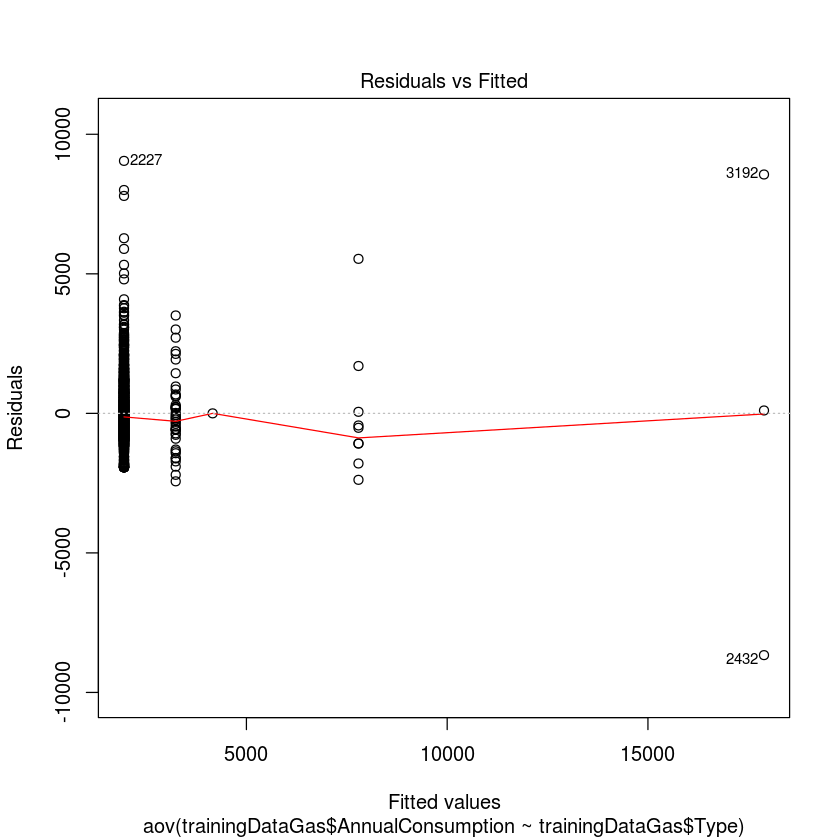

In [23]:
anovaResult <- aov(trainingDataGas$AnnualConsumption ~ trainingDataGas$Type, data=trainingDataGas)
TukeyHSD(anovaResult)
plot(anovaResult, 1)


In [24]:
#Levene test
library(car)
leveneTest(trainingDataGas$AnnualConsumption ~ trainingDataGas$Type, data = trainingDataGas)

,Df,F value,Pr(>F)
group,4,46.01569,2.20853e-37
,2555,NA,NA


In [25]:
#chi-Squre test
chisq.test(trainingDataGas$AnnualConsumption, trainingDataGas$Type, correct=FALSE)
chisq.test(trainingDataGas$AnnualConsumption, trainingDataGas$City, correct=FALSE)

Warning message in chisq.test(trainingDataGas$AnnualConsumption, trainingDataGas$Type, :
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  trainingDataGas$AnnualConsumption and trainingDataGas$Type
X-squared = 9986.9, df = 7148, p-value < 2.2e-16


Warning message in chisq.test(trainingDataGas$AnnualConsumption, trainingDataGas$City, :
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  trainingDataGas$AnnualConsumption and trainingDataGas$City
X-squared = 971810, df = 950680, p-value < 2.2e-16


In [26]:
#2-way ANOVA
TwoWayAnova <- aov(trainingDataGas$AnnualConsumption ~ trainingDataGas$Type + trainingDataGas$City, data = trainingDataGas)
summary(TwoWayAnova)

                       Df    Sum Sq   Mean Sq F value   Pr(>F)    
trainingDataGas$Type    4 1.134e+09 283506746 338.154  < 2e-16 ***
trainingDataGas$City  532 6.370e+08   1197402   1.428 4.16e-08 ***
Residuals            2023 1.696e+09    838395                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "PurchaseArea"      "Street"            "City"             
[4] "Type"              "AnnualConsumption" "noOfConnections"

Importance of components:
                          PC1    PC2
Standard deviation     1.0464 0.9514
Proportion of Variance 0.5474 0.4526
Cumulative Proportion  0.5474 1.0000

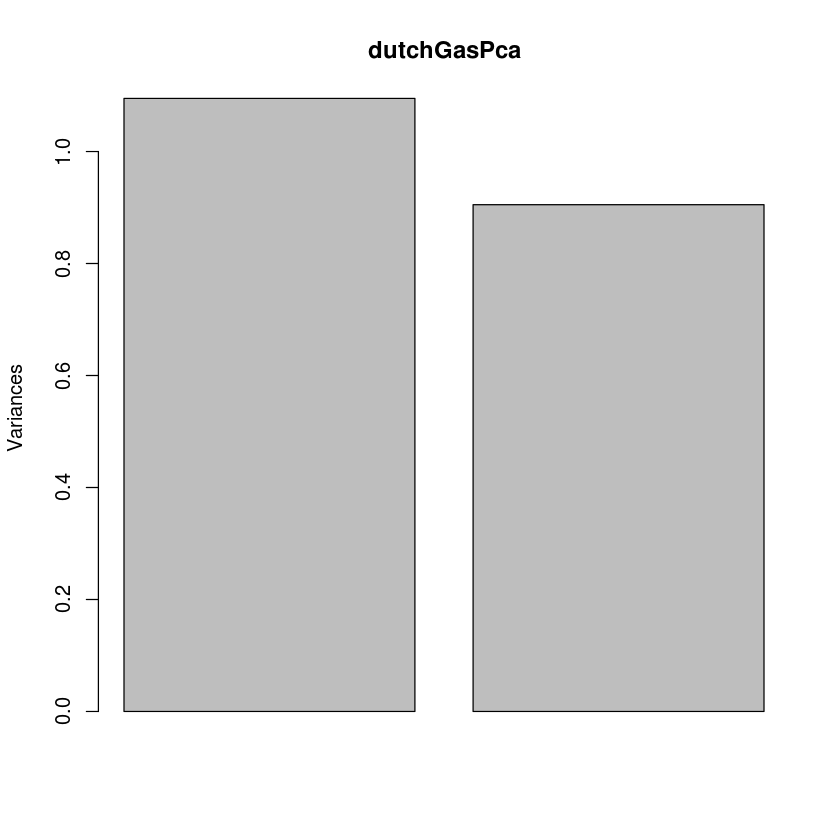

In [27]:
###Priciple component analysis###
names(finalData)
dutchGasPca <- prcomp(finalData[,c(5,6)], center = TRUE,scale = TRUE)
summary(dutchGasPca)
plot(dutchGasPca)
##Not proceeding further as there are ony two  numerical columns

In [32]:
###SVM###
finalDataSvm <- finalData
names(finalDataSvm)
library(sqldf)

finalDataSvm <- mutate(finalDataSvm, Category = ifelse(Type == "G4" ,0 ,
                                        ifelse(Type == "G6",1 ,
                                        ifelse(Type == "G16",2 ,
                                        ifelse(Type == "G25",3 ,
                                        ifelse(Type == "G10",4 ,5
                                      ))))))
head(finalDataSvm)
library(e1071)
fit <- svm(Type ~ AnnualConsumption , data=finalDataSvm, type='C-classification', kernel='linear')
summary(fit)
plot(fit, finalDataSvm,Type~AnnualConsumption,symbolPalette = rainbow(1),col = c("white","red","green","blue","orange"))


[1] "PurchaseArea"      "Street"            "City"             
[4] "Type"              "AnnualConsumption" "noOfConnections"

Type,count(Type)
G4,3200


PurchaseArea,Street,City,Type,AnnualConsumption,noOfConnections,Category
ENEXIS,Pieter Langendijkstraat,HOOGEZAND,G4,533,22,0
ENEXIS,Pr. Beatrixlaan,NIEUWLEUSEN,G4,3667,14,0
ENEXIS,Kalfstraat,MAASTRICHT,G4,2808,23,0
ENEXIS,Westersingel,BERGEN OP ZOOM,G4,1758,14,0
ENEXIS,Neerstraat,'S-HERTOGENBOSCH,G4,285,16,0
ENEXIS,Mussenberg,HORN,G4,2270,24,0



Call:
svm(formula = Type ~ AnnualConsumption, data = finalDataSvm, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  1 

Number of Support Vectors:  139

 ( 64 10 62 2 1 )


Number of Classes:  5 

Levels: 
 G10 G16 G25 G4 G6




ERROR: Error in Summary.factor(structure(c(4L, 4L, 4L, 4L, 4L, 4L, 4L, 4L, 4L, : ‘min’ not meaningful for factors


In [36]:
sqldf("select distinct(type_of_connection),count(type_of_connection) from tempData")

type_of_connection,count(type_of_connection)
G4,3200


Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4

Attaching package: ‘modeltools’

The following object is masked from ‘package:car’:

    Predict

The following object is masked from ‘package:RCurl’:

    clone

Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: libcoin

Attaching package: ‘partykit’

The following objects are masked from ‘package:party’:

    cforest, ctree, ctree_control, edge_simple, mob, mob_control,
    node_barplot, node_bivplot, node_boxplot, node_inner, node_surv,
    node_terminal, varimp




Model formula:
Type ~ AnnualConsumption + noOfConnections

Fitted party:
[1] root
|   [2] AnnualConsumption <= 5593
|   |   [3] AnnualConsumption <= 3253
|   |   |   [4] AnnualConsumption <= 2468: G4 (n = 2496, err = 0.6%)
|   |   |   [5] AnnualConsumption > 2468
|   |   |   |   [6] noOfConnections <= 18: G4 (n = 221, err = 7.2%)
|   |   |   |   [7] noOfConnections > 18: G4 (n = 225, err = 0.9%)
|   |   [8] AnnualConsumption > 3253: G4 (n = 226, err = 11.9%)
|   [9] AnnualConsumption > 5593
|   |   [10] AnnualConsumption <= 8226: G4 (n = 24, err = 45.8%)
|   |   [11] AnnualConsumption > 8226: G25 (n = 8, err = 62.5%)

Number of inner nodes:    5
Number of terminal nodes: 6


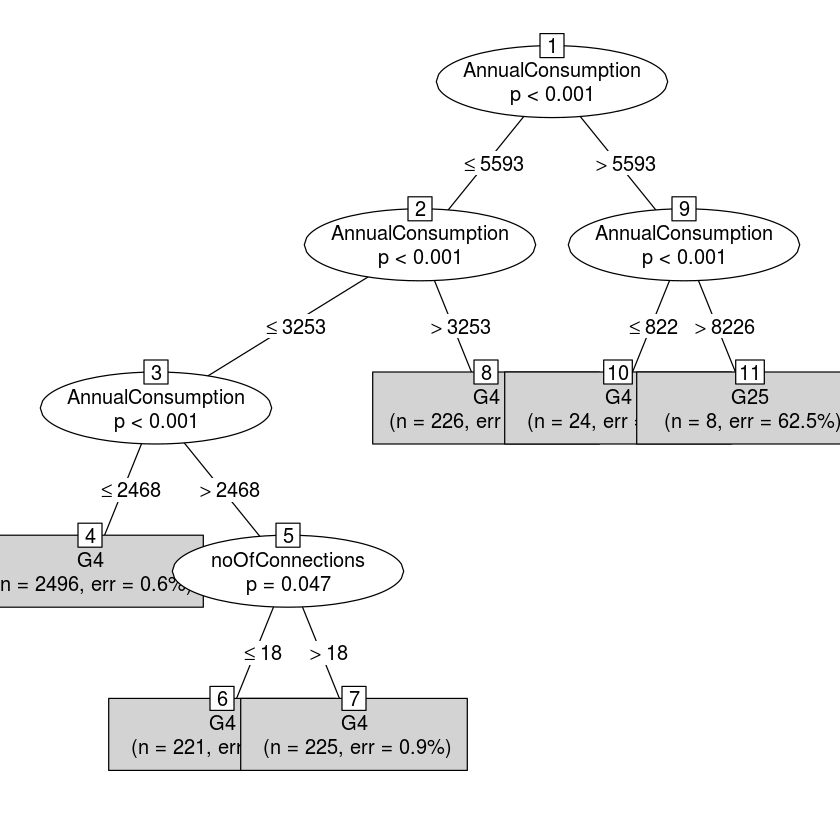

In [37]:
###Decision Tree###

library("party")
library("partykit")
dutchGasctree <- ctree(Type ~ AnnualConsumption + noOfConnections, data=finalData)
print(dutchGasctree)
plot(as.simpleparty(dutchGasctree), type="simple")

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:psych’:

    outlier

The following object is masked from ‘package:dplyr’:

    combine




Call:
 randomForest(formula = Type ~ AnnualConsumption + noOfConnections,      data = finalData, ntree = 5) 
               Type of random forest: classification
                     Number of trees: 5
No. of variables tried at each split: 1

        OOB estimate of  error rate: 2.89%
Confusion matrix:
    G10 G16 G25   G4 G6 class.error
G10   0   0   0    0  0         NaN
G16   0   1   0    7  2 0.900000000
G25   0   1   0    1  0 1.000000000
G4    0   2   0 2788 15 0.006060606
G6    0   2   0   53  1 0.982142857


,MeanDecreaseGini
AnnualConsumption,85.24186
noOfConnections,16.94770


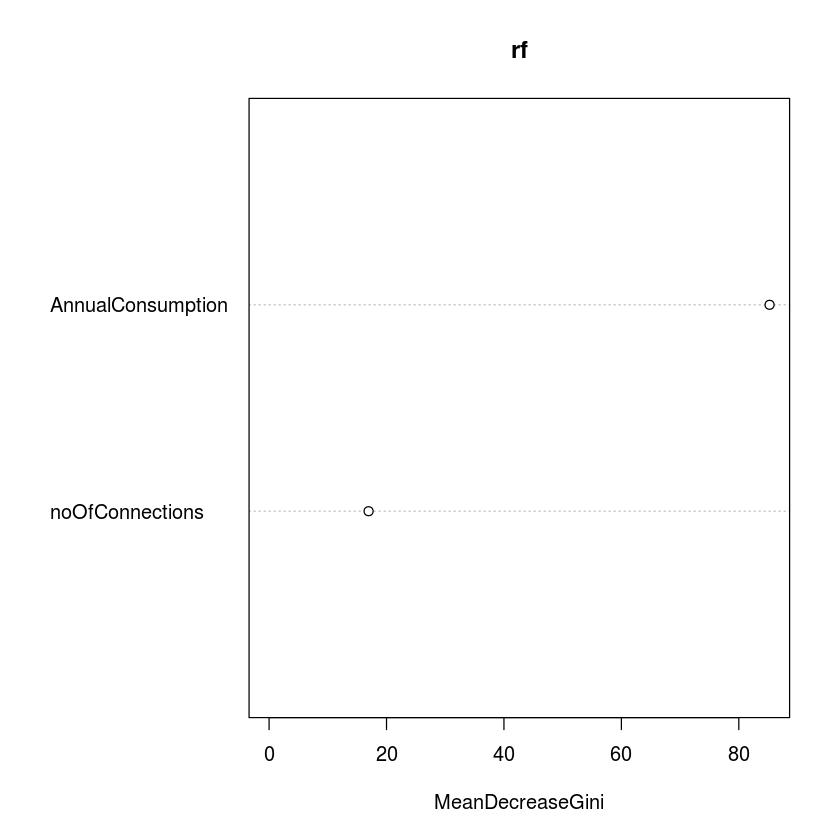

In [39]:
###Random Forest###

library(randomForest)
set.seed(71) 
rf <-randomForest(Type~AnnualConsumption+noOfConnections, data=finalData, ntree=5) 
print(rf)
importance(rf)
varImpPlot(rf)